# clean things up a bit

In [155]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os

input_file = "/home/jeans/nvaitc/battery_timeseries/resources/raw/train_bat_data.pkl"

with open(input_file, "rb") as file:
    train_dict = pickle.load(file)

input_file = "/home/jeans/nvaitc/battery_timeseries/resources/raw/val_bat_data.pkl"

with open(input_file, "rb") as file:
    val_dict = pickle.load(file)
    
loaded_dict = train_dict | val_dict
# type(loaded_dict['b1c1']['q_d_n'])

## Second approach: avg of gradient (only back half)

In [156]:
for bat in loaded_dict:
    print(bat)
    trimmed_arr = np.trim_zeros(loaded_dict[bat]['q_d_n'], 'b')
    loaded_dict[bat]['trimmed_q_d_n'] = list(trimmed_arr)
    loaded_dict[bat]['gradient_q_d_n'] = list(np.gradient(trimmed_arr))
    trimmed_arr = trimmed_arr[len(trimmed_arr)//2:]
    print(np.gradient(trimmed_arr).shape)
    print(np.mean(np.gradient(trimmed_arr)))
    
    loaded_dict[bat]['mean_backhalf_grad'] = np.mean(np.gradient(trimmed_arr))


b1c1
(1081,)
-0.0001512054598629199
b1c3
(718,)
-0.0002491650143041584
b1c5
(537,)
-0.0003298082609194395
b1c7
(435,)
-0.00045141283122972513
b1c11
(395,)
-0.0004198524016368238
b1c15
(360,)
-0.00048128333356645375
b1c17
(429,)
-0.00042178497447834147
b1c19
(394,)
-0.0004686195081865727
b1c21
(279,)
-0.0005897446986167661
b1c24
(509,)
-0.0003455189918488088
b1c26
(435,)
-0.0004404542089878828
b1c28
(431,)
-0.00042246306302099384
b1c30
(355,)
-0.0005237092434520453
b1c32
(366,)
-0.0004969117094258793
b1c34
(372,)
-0.0004948784587203816
b1c36
(353,)
-0.0005184172233170896
b1c38
(309,)
-0.0005835925491110793
b1c40
(483,)
-0.0003809121824939799
b1c42
(352,)
-0.0005337765271013433
b1c44
(308,)
-0.0006142637946388938
b2c0
(164,)
-0.0010667039853770558
b2c2
(233,)
-0.0009794554996899781
b2c4
(236,)
-0.0008674488734390776
b2c6
(273,)
-0.0006201041268778371
b2c11
(253,)
-0.0008487828635415541
b2c13
(261,)
-0.0008093959070256843
b2c17
(264,)
-0.0008499999389503942
b2c19
(246,)
-0.000713744056903

In [157]:
loaded_dict

{'b1c1': {'q_d_n': [1.0499999523162842,
   1.075301170349121,
   1.0766123533248901,
   1.0772981643676758,
   1.0781505107879639,
   1.078544020652771,
   1.0789694786071777,
   1.0793800354003906,
   1.0795894861221313,
   1.079776644706726,
   1.0800153017044067,
   1.0845894813537598,
   1.0823009014129639,
   1.0819395780563354,
   1.081835150718689,
   1.0819742679595947,
   1.0820032358169556,
   1.0819748640060425,
   1.0818729400634766,
   1.0818581581115723,
   1.0818721055984497,
   1.0819226503372192,
   1.0819178819656372,
   1.0820436477661133,
   1.0820176601409912,
   1.0820863246917725,
   1.0821022987365723,
   1.0820186138153076,
   1.0819743871688843,
   1.081928014755249,
   1.0819486379623413,
   1.0819107294082642,
   1.0819109678268433,
   1.0819156169891357,
   1.0819072723388672,
   1.081823468208313,
   1.081803321838379,
   1.0817220211029053,
   1.0817707777023315,
   1.081763505935669,
   1.0818428993225098,
   1.0818408727645874,
   1.081842303276062,
   

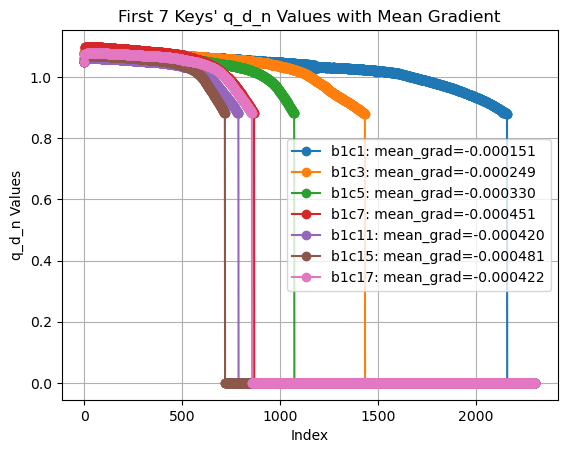

In [158]:
first_7_keys = list(loaded_dict.keys())[:7]

# Plotting each key's q_d_n
for key in first_7_keys:
    q_d_n = loaded_dict[key]['q_d_n']
    mean_grad = loaded_dict[key]['mean_backhalf_grad']
    plt.plot(q_d_n, marker='o', label=f"{key}: mean_grad={mean_grad:.6f}")

plt.xlabel("Index")
plt.ylabel("q_d_n Values")
plt.title("First 7 Keys' q_d_n Values with Mean Gradient")
plt.legend()
plt.grid(True)
plt.show()

In [159]:

head = 2
print(loaded_dict.keys())
for batteryID in loaded_dict.keys():
    print(batteryID, loaded_dict[batteryID].keys())
    print("trimmed_q_d_n", len(loaded_dict[batteryID]['trimmed_q_d_n']),  loaded_dict[batteryID]['trimmed_q_d_n'])
    print("gradient_q_d_n", len(loaded_dict[batteryID]['gradient_q_d_n']),  loaded_dict[batteryID]['gradient_q_d_n'])
    print("cycle", loaded_dict[batteryID]['cycle'])
    head -= 1
    if head == 0:
        break

# export as pickle
output_file = "/home/jeans/nvaitc/battery_timeseries/resources/processed/bat_data_for_kg.pkl"
os.makedirs(os.path.dirname(output_file), exist_ok=True)
with open(output_file, "wb") as file:
    pickle.dump(loaded_dict, file)

dict_keys(['b1c1', 'b1c3', 'b1c5', 'b1c7', 'b1c11', 'b1c15', 'b1c17', 'b1c19', 'b1c21', 'b1c24', 'b1c26', 'b1c28', 'b1c30', 'b1c32', 'b1c34', 'b1c36', 'b1c38', 'b1c40', 'b1c42', 'b1c44', 'b2c0', 'b2c2', 'b2c4', 'b2c6', 'b2c11', 'b2c13', 'b2c17', 'b2c19', 'b2c21', 'b2c23', 'b2c25', 'b2c27', 'b2c29', 'b2c31', 'b2c33', 'b2c35', 'b2c37', 'b2c39', 'b2c41', 'b2c43', 'b2c45', 'b1c0', 'b1c2', 'b1c4', 'b1c6', 'b1c9', 'b1c14', 'b1c16', 'b1c18', 'b1c20', 'b1c23', 'b1c25', 'b1c27', 'b1c29', 'b1c31', 'b1c33', 'b1c35', 'b1c37', 'b1c39', 'b1c41', 'b1c43', 'b1c45', 'b2c1', 'b2c3', 'b2c5', 'b2c10', 'b2c12', 'b2c14', 'b2c18', 'b2c20', 'b2c22', 'b2c24', 'b2c26', 'b2c28', 'b2c30', 'b2c32', 'b2c34', 'b2c36', 'b2c38', 'b2c40', 'b2c42', 'b2c44', 'b2c46'])
b1c1 dict_keys(['q_d_n', 'cycle', 'trimmed_q_d_n', 'gradient_q_d_n', 'mean_backhalf_grad'])
trimmed_q_d_n 2161 [1.0499999523162842, 1.075301170349121, 1.0766123533248901, 1.0772981643676758, 1.0781505107879639, 1.078544020652771, 1.0789694786071777, 1.07938